# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

Выполнил: 6133, Борисов

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import pandas as pd
from numpy import argmax
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

## Star dataset to predict star types

A 6 class star dataset for star classification with Deep Learned approaches.

**Dataset Info:**

This is a dataset consisting of several features of stars.

Some of them are:

* __Integer__: Absolute Temperature **(in K)** - This column consists of the Surface temperatures of several stars
* __Real__: Relative Luminosity **(L/Lo)** - This column consists of the Luminosity of several stars calculated with respect to sun(L/Lo)
* __Real__: Relative Radius **(R/Ro)** - This column consists of the Radius of several stars calculated with respect to sun(R/Ro)
* __Real__: Absolute Magnitude **(Mv)** - This column consists of the Absolute Visual magnitude(Mv) of several stars
* __Categorical__: Star Color **(white,Red,Blue,Yellow,yellow-orange etc)** - This column contains the info about the colors of each star after Spectral Analysis
* __Categorical__: Spectral Class **(O,B,A,F,G,K,M)** - This column contains info about the spectral classes of each star(O,B,A,F,G,K,M) 
* __Categorical__: Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)** - This column is the output class (6 classes ranging from 0-5) 0 -> Brown Dwarf 1-> Red Dwarf 2 -> White Dwarf 3-> Main Sequence 4 -> Supergiant 5 -> Hypergiant

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [2]:
dataset = pd.read_csv('../data/Star_dataset.csv')
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
dataset['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [4]:
# Изменение строковых параметров в числовые

unique_colors = dataset['Star color'].unique()
colors_dict = dict(zip(unique_colors, range(0, len(unique_colors))))
print(colors_dict)

sp_class_dict = {'O': 0, 'B': 1,'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
print(sp_class_dict)

dataset['Star color'] = dataset['Star color'].apply(lambda color: colors_dict[color])
dataset['Spectral Class'] = dataset['Spectral Class'].apply(lambda cls: sp_class_dict[cls])

{'Red': 0, 'Blue White': 1, 'White': 2, 'Yellowish White': 3, 'Blue white': 4, 'Pale yellow orange': 5, 'Blue': 6, 'Blue-white': 7, 'Whitish': 8, 'yellow-white': 9, 'Orange': 10, 'White-Yellow': 11, 'white': 12, 'Blue ': 13, 'yellowish': 14, 'Yellowish': 15, 'Orange-Red': 16, 'Blue white ': 17, 'Blue-White': 18}
{'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int64  
 6   Spectral Class          240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


In [6]:
dataset.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,3.433333,3.479167
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,3.959488,2.531720
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,0.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,1.000000,3.000000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,6.000000,6.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000,18.000000,6.000000


In [7]:
labels = dataset['Star type']
data = dataset.drop(columns='Star type')
data.shape, labels.shape

((240, 6), (240,))

## **1. Многоклассовая классификация:**

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

In [8]:
# 1.1 и 1.3 - Объединил два пункта
def check_knn_accuracy(data, labels, test_size=0.3, return_split=False, state=None):

  Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, labels, test_size=test_size, random_state=state)
  
  training_accuracy = []
  test_accuracy = []
  estimator = []
  # пробуем n_neighbors от 1 до 10
  neighbors_settings = range(1, 10)
  for n_neighbors in neighbors_settings:
    # строим модель
    clf = KNeighborsClassifier( n_neighbors = n_neighbors )
    clf.fit(Xtrain, Ytrain)
    estimator.append(clf)
    # записываем правильность на обучающем наборе
    training_accuracy.append( clf.score(Xtrain, Ytrain) )
    # записываем правильность на тестовом наборе
    test_accuracy.append( clf.score(Xtest, Ytest) )

  plt.plot( neighbors_settings, training_accuracy, label="правильность на обучающем наборе" )
  plt.plot( neighbors_settings, test_accuracy, label="правильность на тестовом наборе" )
  plt.ylabel("Правильность")
  plt.xlabel("количество соседей")
  plt.legend()

  results = pd.DataFrame(dict(training_accuracy=training_accuracy, test_accuracy=test_accuracy, estimator=estimator))

  return results, (Xtrain, Xtest, Ytrain, Ytest) if return_split else None

,training_accuracy,test_accuracy,estimator
0,1.000000,0.694444,KNeighborsClassifier(n_neighbors=1)
1,0.839286,0.611111,KNeighborsClassifier(n_neighbors=2)
2,0.839286,0.583333,KNeighborsClassifier(n_neighbors=3)
3,0.761905,0.597222,KNeighborsClassifier(n_neighbors=4)
4,0.785714,0.625000,KNeighborsClassifier()
5,0.696429,0.597222,KNeighborsClassifier(n_neighbors=6)
6,0.708333,0.541667,KNeighborsClassifier(n_neighbors=7)
7,0.684524,0.472222,KNeighborsClassifier(n_neighbors=8)
8,0.702381,0.513889,KNeighborsClassifier(n_neighbors=9)


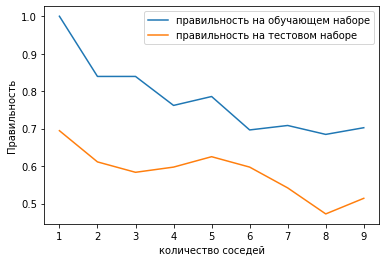

In [9]:
results1, (Xtrain, Xtest, Ytrain, Ytest) = check_knn_accuracy(data, labels, return_split=True, state=0)
results1

In [10]:
accuracy1 = results1['test_accuracy'].max()
best_n_neighbors = results1['test_accuracy'].argmax() + 1
print('Самое оптимальный параметр n_neighbors: ', best_n_neighbors)
print("Лучший показатель accuracy без кросс валидации: ", accuracy1)

Самое оптимальный параметр n_neighbors:  1
Лучший показатель accuracy без кросс валидации:  0.6944444444444444


In [11]:
# 1.2 Кросс валидация
results2 = cross_validate(KNeighborsClassifier(n_neighbors = best_n_neighbors), data, labels, cv=5, 
                                scoring='accuracy', return_estimator=True, 
                                return_train_score=True)
results2 = pd.DataFrame(results2)
results2

,fit_time,score_time,estimator,test_score,train_score
0,0.004994,0.007715,KNeighborsClassifier(n_neighbors=1),0.583333,1.0
1,0.004550,0.008183,KNeighborsClassifier(n_neighbors=1),0.666667,1.0
2,0.003002,0.006004,KNeighborsClassifier(n_neighbors=1),0.750000,1.0
3,0.003000,0.005030,KNeighborsClassifier(n_neighbors=1),0.791667,1.0
4,0.003998,0.008006,KNeighborsClassifier(n_neighbors=1),0.729167,1.0


In [12]:
accuracy2 = results2['test_score'].max()
print("Лучший показатель accuracy с кросс валидацией: ", accuracy2)

Лучший показатель accuracy с кросс валидацией:  0.7916666666666666


1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

In [13]:
# Построение confusion matrix для лучшей выборки гиперпараметров
def report_classification(model, Xtest, Ytest, get_conf_matr=False):
    pred = model.predict(Xtest)

    print('Отчёт по метрикам оценки мультиклассового классификации:')
    print(classification_report(Ytest, pred))
    conf_mat = confusion_matrix(Ytest, pred)
    sn.heatmap(conf_mat, annot=True, fmt="d")
    
    return conf_mat if get_conf_matr else None

### Получение отчёта по обученной модели **без кросс валидации** с наибольшим accuracy

Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.67      0.46      0.55        13
           2       0.73      1.00      0.84         8
           3       1.00      0.75      0.86        16
           4       0.64      0.69      0.67        13
           5       0.64      0.58      0.61        12

    accuracy                           0.69        72
   macro avg       0.70      0.71      0.69        72
weighted avg       0.72      0.69      0.69        72



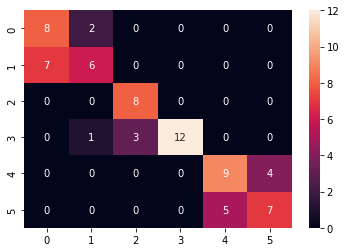

In [14]:
neighbors_model = results1[results1['test_accuracy'] == accuracy1]['estimator'].head(1).item()
report_classification(neighbors_model, Xtest, Ytest)

### Получение отчёта по обученной модели **кросс валидацией** с наибольшим accuracy

Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        16
           4       0.93      1.00      0.96        13
           5       1.00      0.92      0.96        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



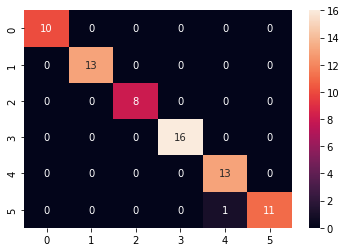

In [15]:
neighbors_model = results2[results2['test_score'] == accuracy2]['estimator'].head(1).item()
report_classification(neighbors_model, Xtest, Ytest)

## **2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`


Вместо другого датасета используется **тот же датасет со звёздами**, но только по двум типам звёзд

In [16]:
two_classes = (0, 1)
bin_dataset = dataset[dataset['Star type'].isin(two_classes)]
bin_dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.120,0,0,6
1,3042,0.000500,0.1542,16.600,0,0,6
2,2600,0.000300,0.1020,18.700,0,0,6
3,2800,0.000200,0.1600,16.650,0,0,6
4,1939,0.000138,0.1030,20.060,0,0,6
...,...,...,...,...,...,...,...
195,3598,0.002700,0.6700,13.667,1,0,6
196,3142,0.001320,0.2580,14.120,1,0,6
197,3496,0.001250,0.3360,14.940,1,0,6
198,3324,0.006500,0.4710,12.780,1,0,6


In [17]:
bin_labels = bin_dataset['Star type']
bin_data = bin_dataset.drop(columns='Star type')
bin_data.shape, bin_labels.shape

((80, 6), (80,))

,training_accuracy,test_accuracy,estimator
0,1.000000,0.541667,KNeighborsClassifier(n_neighbors=1)
1,0.803571,0.541667,KNeighborsClassifier(n_neighbors=2)
2,0.839286,0.583333,KNeighborsClassifier(n_neighbors=3)
3,0.839286,0.583333,KNeighborsClassifier(n_neighbors=4)
4,0.785714,0.583333,KNeighborsClassifier()
5,0.785714,0.583333,KNeighborsClassifier(n_neighbors=6)
6,0.785714,0.625000,KNeighborsClassifier(n_neighbors=7)
7,0.785714,0.625000,KNeighborsClassifier(n_neighbors=8)
8,0.767857,0.625000,KNeighborsClassifier(n_neighbors=9)


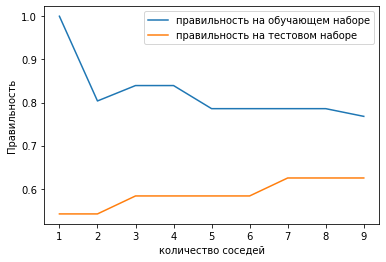

In [18]:
results3, (Xtrain, Xtest, Ytrain, Ytest) = check_knn_accuracy(bin_data, bin_labels, return_split=True, state=0)
results3

In [19]:
accuracy3 = results3['test_accuracy'].max()
bin_best_n_neighbors = results3['test_accuracy'].argmax() + 1
print('Самое оптимальный параметр n_neighbors: ', bin_best_n_neighbors)
print("Лучший показатель accuracy без кросс валидации: ", accuracy3)

Самое оптимальный параметр n_neighbors:  7
Лучший показатель accuracy без кросс валидации:  0.625


In [20]:
# 1.2 Кросс валидация
results4 = cross_validate(KNeighborsClassifier(n_neighbors = bin_best_n_neighbors), data, labels, cv=5, 
                                scoring='accuracy', return_estimator=True, 
                                return_train_score=True)
results4 = pd.DataFrame(results4)
results4

,fit_time,score_time,estimator,test_score,train_score
0,0.005008,0.008987,KNeighborsClassifier(n_neighbors=7),0.583333,0.739583
1,0.002997,0.007016,KNeighborsClassifier(n_neighbors=7),0.541667,0.708333
2,0.003000,0.009027,KNeighborsClassifier(n_neighbors=7),0.645833,0.755208
3,0.003009,0.004998,KNeighborsClassifier(n_neighbors=7),0.625000,0.692708
4,0.005001,0.011008,KNeighborsClassifier(n_neighbors=7),0.562500,0.734375


In [21]:
accuracy4 = results4['test_score'].max()
print("Лучший показатель accuracy с кросс валидацией: ", accuracy4)

Лучший показатель accuracy с кросс валидацией:  0.6458333333333334


### Получение отчёта по обученной **бинарной** модели **без кросс валидации** с наибольшим accuracy

Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.50      0.67      0.57         9

    accuracy                           0.62        24
   macro avg       0.62      0.63      0.62        24
weighted avg       0.66      0.62      0.63        24



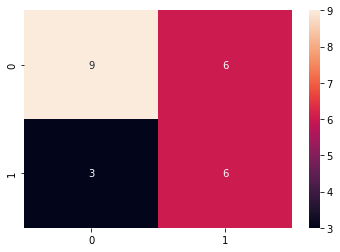

In [22]:
neighbors_model = results3[results3['test_accuracy'] == accuracy3]['estimator'].head(1).item()
report_classification(neighbors_model, Xtest, Ytest)

### Получение отчёта по обученной **бинарной** модели **кросс валидацией** с наибольшим accuracy

Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.54      0.78      0.64         9

    accuracy                           0.67        24
   macro avg       0.68      0.69      0.66        24
weighted avg       0.71      0.67      0.67        24



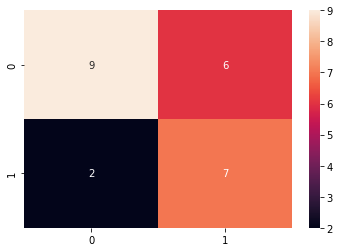

In [23]:
neighbors_model = results4[results4['test_score'] == accuracy4]['estimator'].item()
report_classification(neighbors_model, Xtest, Ytest)

## **3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [24]:
scaler = StandardScaler()
scaled_mul_ds = scaler.fit_transform(data)
scaled_bin_ds = scaler.fit_transform(bin_data)

,training_accuracy,test_accuracy,estimator
0,1.000000,0.986111,KNeighborsClassifier(n_neighbors=1)
1,1.000000,0.986111,KNeighborsClassifier(n_neighbors=2)
2,0.994048,1.000000,KNeighborsClassifier(n_neighbors=3)
3,0.970238,0.972222,KNeighborsClassifier(n_neighbors=4)
4,0.976190,0.986111,KNeighborsClassifier()
5,0.964286,0.958333,KNeighborsClassifier(n_neighbors=6)
6,0.964286,0.972222,KNeighborsClassifier(n_neighbors=7)
7,0.970238,0.972222,KNeighborsClassifier(n_neighbors=8)
8,0.952381,0.972222,KNeighborsClassifier(n_neighbors=9)


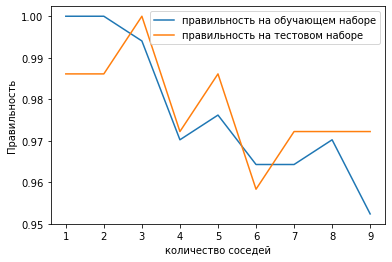

In [25]:
results5, (Xtrain, Xtest, Ytrain, Ytest) = check_knn_accuracy(scaled_mul_ds, labels, return_split=True, state=0)
results5

In [26]:
accuracy5 = results5['test_accuracy'].max()
scaled_best_n_neighbors = results5['test_accuracy'].argmax() + 1
print('Самое оптимальный параметр n_neighbors: ', scaled_best_n_neighbors)
print("Лучший показатель accuracy без кросс валидации: ", accuracy5)

Самое оптимальный параметр n_neighbors:  3
Лучший показатель accuracy без кросс валидации:  1.0


Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



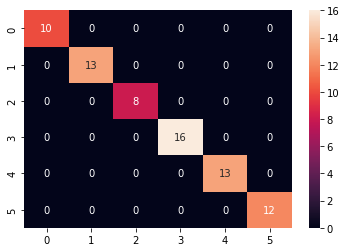

In [27]:
neighbors_model = results5[results5['test_accuracy'] == accuracy5]['estimator'].head(1).item()
report_classification(neighbors_model, Xtest, Ytest)

,training_accuracy,test_accuracy,estimator
0,1.000000,1.000000,KNeighborsClassifier(n_neighbors=1)
1,0.982143,1.000000,KNeighborsClassifier(n_neighbors=2)
2,0.982143,1.000000,KNeighborsClassifier(n_neighbors=3)
3,0.982143,1.000000,KNeighborsClassifier(n_neighbors=4)
4,0.982143,1.000000,KNeighborsClassifier()
5,0.982143,0.958333,KNeighborsClassifier(n_neighbors=6)
6,0.982143,0.958333,KNeighborsClassifier(n_neighbors=7)
7,0.982143,0.958333,KNeighborsClassifier(n_neighbors=8)
8,0.982143,0.958333,KNeighborsClassifier(n_neighbors=9)


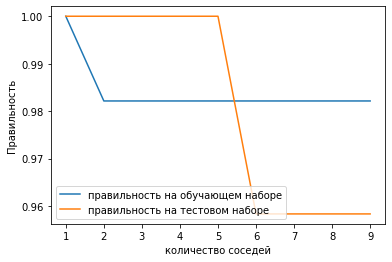

In [28]:
results6, (Xtrain, Xtest, Ytrain, Ytest) = check_knn_accuracy(scaled_bin_ds, bin_labels, return_split=True, state=0)
results6

In [29]:
accuracy6 = results6['test_accuracy'].max()
scaled_bin_best_n_neighbors = results6['test_accuracy'].argmax() + 1
print('Самое оптимальный параметр n_neighbors: ', scaled_bin_best_n_neighbors)
print("Лучший показатель accuracy без кросс валидации: ", accuracy6)

Самое оптимальный параметр n_neighbors:  1
Лучший показатель accuracy без кросс валидации:  1.0


Отчёт по метрикам оценки мультиклассового классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



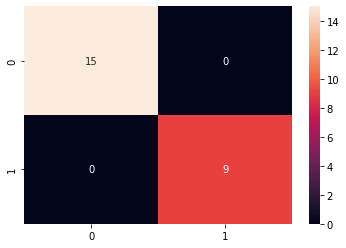

In [30]:
neighbors_model = results6[results6['test_accuracy'] == accuracy6]['estimator'].head(1).item()
report_classification(neighbors_model, Xtest, Ytest)

# Вывод

Нормализация данных и кросс валидация помогают лучше обучить модель

In [31]:
accuracies = pd.DataFrame([accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6], 
                            index=['acc1', 'acc2', 'acc3', 'acc4', 'acc5', 'acc6'], columns=['accuracies'])
accuracies

,accuracies
acc1,0.694444
acc2,0.791667
acc3,0.625000
acc4,0.645833
acc5,1.000000
acc6,1.000000
